In [104]:
import pandas as pd 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re 
import matplotlib.pyplot as plt 
from datetime import datetime

In [84]:
data = pd.read_csv("emotion_df.csv")
d1 = pd.read_csv('data.csv')
analyzer = SentimentIntensityAnalyzer()

In [97]:
d1 = d1[d1['person'].isin(['Kamala Harris', 'Joseph R. Biden', 'Donald J. Trump'])].reset_index(drop=True)

In [99]:
data['date']=d1['date']

In [109]:
data['date'] = pd.to_datetime(data['date'])

In [137]:
d1.loc[0, 'transcript'].split('\n')

['',
 'Campaign Continues Growing Super Tuesday Infrastructure',
 'Today, Biden for President is adding staff to its growing Super Tuesday team, tapping Fernando Mercado as Virginia State Director and Travis Brimm as North Carolina State Director.',
 '"We are thrilled to expand our Super Tuesday team in Virginia and North Carolina with experienced Democratic strategists that will help grow Joe Biden\'s diverse, broad, and enduring coalition throughout the South," said Molly Ritner, Director of Super Tuesday States, Biden for President. "Fernando and Travis have deep roots in these states and have united Virginians and North Carolinians in tough districts to help elect Democrats up and down the ballot. With Fernando and Travis at the helm, our campaign is in a position of strength to build our support, pick up delegates, and win across the South."',
 'Biden for President previously announced leadership for Super Tuesday and battleground states like California, Massachusetts, Texas, and 

In [115]:
data = data.dropna().reset_index(drop=True)

In [116]:
data['processed_transcript'] = data['processed_transcript'].str.replace('\d+', '', regex=True)

In [117]:
raw_emotions_df = data.apply(lambda x: analyzer.polarity_scores(x['processed_transcript']), axis=1, result_type='expand')

In [64]:
# for i in range(len(data)):
#     print(i)
#     m = re.search("\d", data.loc[i, 'processed_transcript'])
#     if m:
#         print(f'{i} -> {m}')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [68]:
data.loc[1140, 'processed_transcript']

'joe biden yesterday indicated send national guard cities states left wing mobs rioting portland case months month issued written statement specifically portland called rioters peaceful protestors accused federal law enforcement officers stoking fires division mob literally setting fire federal courthouse following biden lead leftist mayor portland continues reject president trump offer federal assistance quell riots raged  days resulted death months joe biden remained silent rampant violence destruction overtaking democrat run cities biden allies rejected federal assistance ordered local police let rioters run wild biden campaign helped bail accused violent criminals jail including murderer rapist rioter shot police obvious law abiding americans biden allies elected november wo safe joe biden america \n tim murtaugh trump  communications director'

In [118]:
lol = pd.concat([data, raw_emotions_df], axis=1)

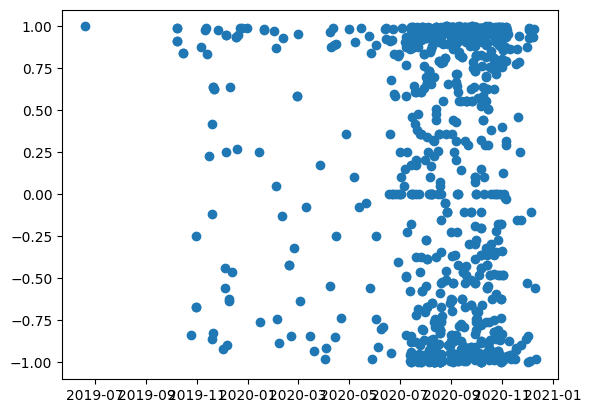

In [129]:
plt.scatter(lol.loc[lol['person'] == 'Donald J. Trump', 'date'], lol.loc[lol['person'] == 'Donald J. Trump', 'compound'])

In [130]:
average_emotions = lol.groupby(['person', 'date'])[['neg', 'neu', 'pos', 'compound']].mean()

In [131]:
average_emotions

neg     neu    pos  compound
person          date                                                      
Donald J. Trump 2019-06-18 20:00:00+00:00  0.1170  0.5090  0.374   1.00000
                2019-10-08 00:00:00+00:00  0.0315  0.5965  0.372   0.95165
                2019-10-15 00:00:00+00:00  0.0000  0.7950  0.205   0.84020
                2019-10-24 00:00:00+00:00  0.1640  0.7250  0.111  -0.83600
                2019-10-30 00:00:00+00:00  0.1950  0.7350  0.070  -0.67050
...                                           ...     ...    ...       ...
Kamala Harris   2020-08-12 00:00:00+00:00  0.1450  0.5800  0.275   0.99930
                2020-08-19 00:00:00+00:00  0.1180  0.5480  0.334   0.99970
                2020-09-18 00:00:00+00:00  0.0770  0.4890  0.433   0.99670
                2020-09-28 00:00:00+00:00  0.1050  0.5780  0.317   0.99980
                2020-11-07 20:28:00+00:00  0.0860  0.5660  0.348   0.99920

[619 rows x 4 columns]

In [133]:
average_emotions.plot(kind='scatter', figsize=(15, 10))
plt.title('Average Emotion Scores by Candidate')
plt.xlabel('Candidate')
plt.ylabel('Average Emotion Scores')
plt.show()

ValueError: scatter requires an x and y column